# Content Feature Extraction Demo

This notebook fetches HTML from given URLs, extracts DOM-based features using `ContentFeatureExtractor`, and visualizes the results.

In [7]:
import sys
sys.path.append('/mnt/data/utils/data')  # adjust path if needed
from content_feature_extractor import ContentFeatureExtractor
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load URLs from a CSV file (first column contains URLs)
url_data = pd.read_csv('../../raw/raw/combined_dataset.csv')  # Replace 'urls.csv' with your file path
urls = url_data.iloc[:, 0].tolist()  # Extract first column as list

# Show how many URLs were loaded
print(f"Loaded {len(urls)} URLs from CSV file")
print(f"First 5 URLs: {urls[:5]}")

Loaded 1001 URLs from CSV file
First 5 URLs: ['https://auth-m-start-ledgerre.webflow.io/,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://bit.ly/3XVDSvj,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://setuplbpro75002.firebaseapp.com/,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://l.ead.me/bfI7Co,1,PhishTank,2025-05-10T12:28:07.544276+00:00', 'https://bit.ly/1Q6rz,1,PhishTank,2025-05-10T12:28:07.544276+00:00']


In [9]:
# Initialize extractor and fetch+extract features
extractor = ContentFeatureExtractor()
features = extractor.transform(urls)
columns = [
    'num_tags','num_links','num_external_links','num_forms',
    'num_inputs','num_hidden_inputs','num_scripts','num_iframes',
    'num_images','num_onclick_attrs','num_meta_refresh',
    'text_length','word_count','suspicious_word_count'
]
df = pd.DataFrame(features, columns=columns)
df.index = urls
df

ParserError: Document is empty

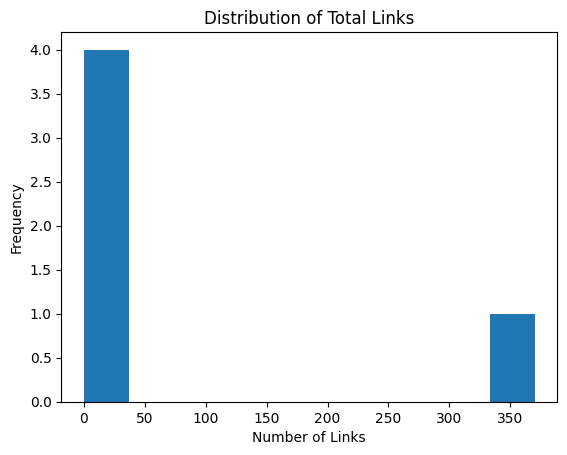

In [ ]:
# Histogram of number of links per page
plt.figure()
plt.hist(df['num_links'])
plt.title('Distribution of Total Links')
plt.xlabel('Number of Links')
plt.ylabel('Frequency')
plt.show()

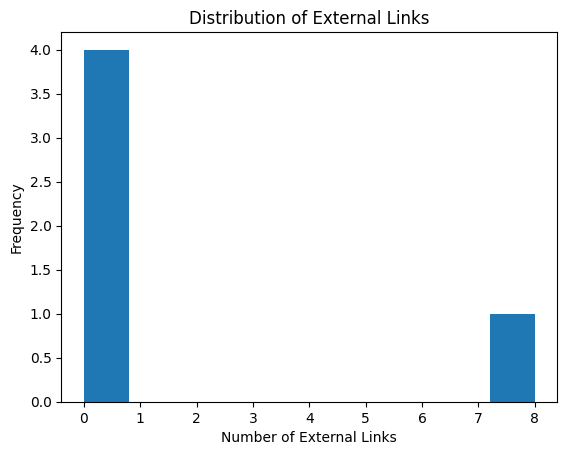

In [ ]:
# Histogram of external links per page
plt.figure()
plt.hist(df['num_external_links'])
plt.title('Distribution of External Links')
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.show()

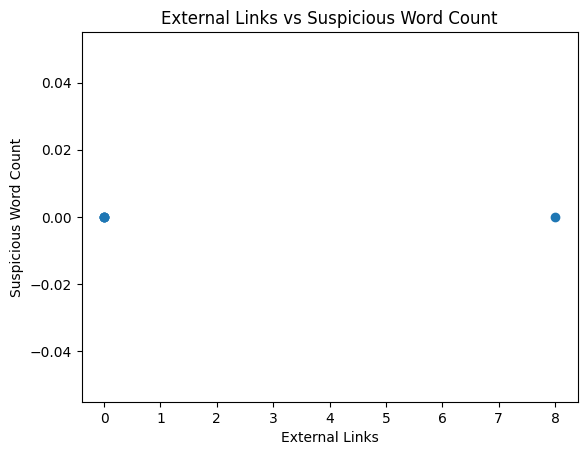

In [ ]:
# Scatter: suspicious word count vs external links
plt.figure()
plt.scatter(df['num_external_links'], df['suspicious_word_count'])
plt.title('External Links vs Suspicious Word Count')
plt.xlabel('External Links')
plt.ylabel('Suspicious Word Count')
plt.show()